# 🏠 California House Price Prediction using Machine Learning

## Objective:
To predict the median house prices in California using demographic and location-based features from the `fetch_california_housing()` dataset.

## Key Tasks:
- Exploratory Data Analysis
- Feature Scaling and Model Training
- Model Evaluation using MAE, RMSE, R²
- Hyperparameter Tuning
- Feature Importance Analysis


In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [3]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

In [4]:
# Basic data inspection
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

# Summary statistics
df.describe()


(20640, 9)
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Price         float64
dtype: object
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


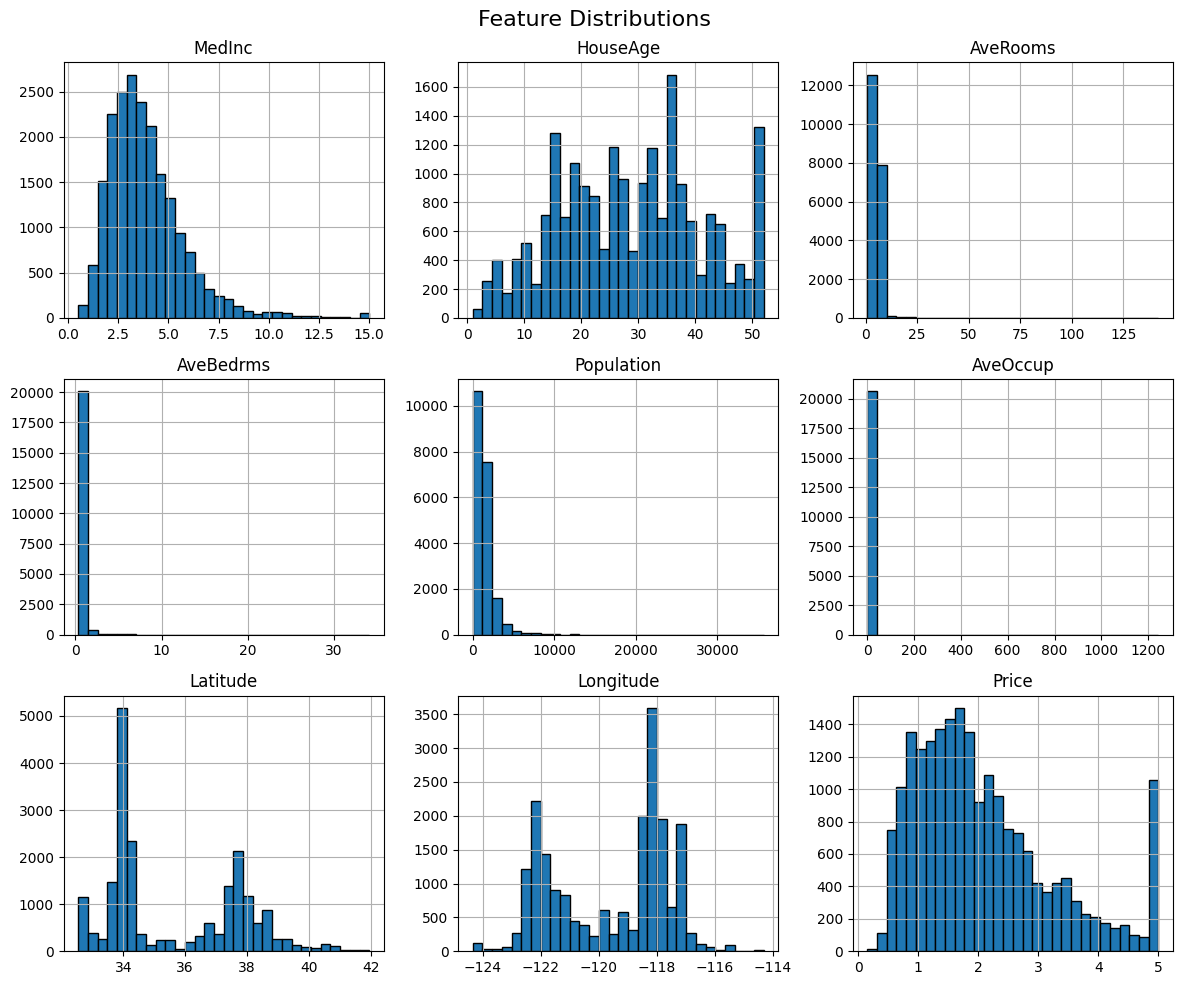

In [5]:
# Plot histograms for each feature
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()


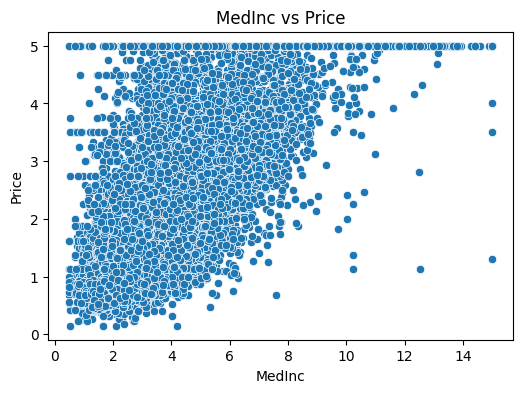

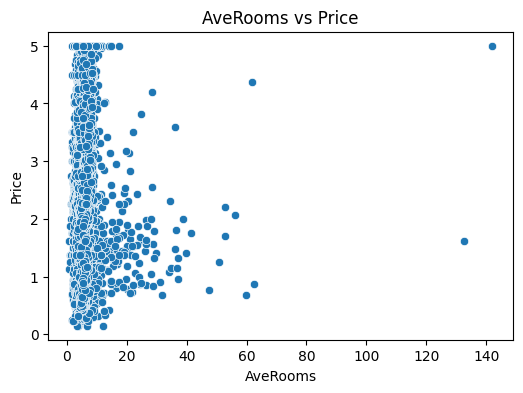

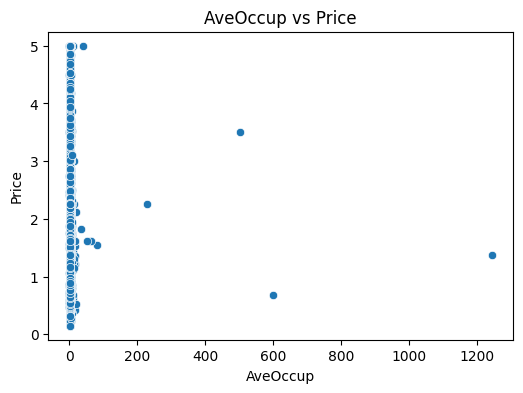

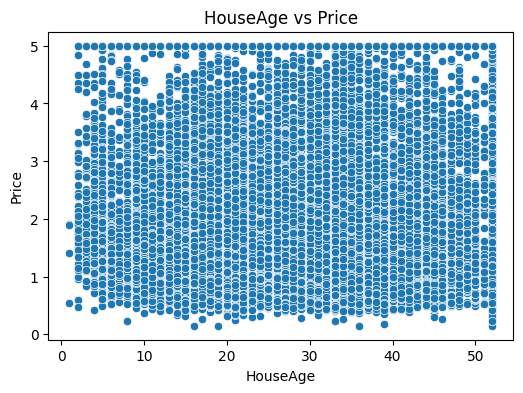

In [6]:
# Scatter plots of selected features vs target
important_features = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
for col in important_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f'{col} vs Price')
    plt.show()


In [7]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [9]:
print("\nChecking for missing values:\n", df.isnull().sum())


Checking for missing values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


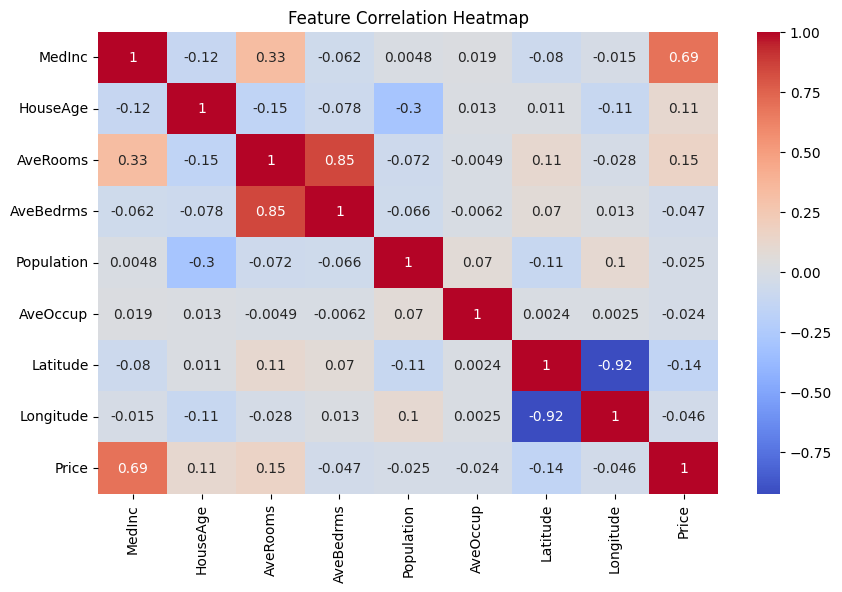

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
X = df.drop(columns=['Price'])
y = df['Price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:
print("\n Model Performance:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


 Model Performance:
Mean Absolute Error: 0.3274
Mean Squared Error: 0.2552
Root Mean Squared Error: 0.5051
R² Score: 0.8053


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,              # 3-fold cross-validation
    scoring='r2',      # Optimize for R² score
    n_jobs=-1,         # Use all available CPU cores
    verbose=1
)
print(" Tuning hyperparameters, please wait...")

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
y_pred_best_rf = best_rf.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best = r2_score(y_test, y_pred_best_rf)

print("\n🔧 Tuned Random Forest Performance:")
print(f"MAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}, R²: {r2_best:.2f}")


 Tuning hyperparameters, please wait...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

🔧 Tuned Random Forest Performance:
MAE: 0.33, RMSE: 0.50, R²: 0.81


## Model Comparison (Random Forest vs Linear Regression vs XGBoost)


In [19]:
# Import required models
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)  # Fit to training data
y_pred_lr = lr.predict(X_test)  # Predict on test data

# Train an XGBoost Regressor model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)  # Fit to training data
y_pred_xgb = xgb.predict(X_test)  # Predict on test data

# Define a function to evaluate models using MAE, RMSE, and R² Score
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)  # Mean Absolute Error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Root Mean Squared Error
    r2 = r2_score(y_true, y_pred)  # R² Score (coefficient of determination)
    return [name, mae, rmse, r2]

# Evaluate all models and store results
results = []
results.append(evaluate_model("Random Forest", y_test, y_pred))       # Already trained earlier
results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb))

# Create a DataFrame to compare performance metrics across models
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R² Score"])
print(" Model Comparison:\n")
print(results_df)


 Model Comparison:

               Model       MAE      RMSE  R² Score
0      Random Forest  0.327425  0.505143  0.805275
1  Linear Regression  0.533200  0.745581  0.575788
2            XGBoost  0.315451  0.476720  0.826571


In [20]:
sample = np.array([X_test[0]])  # Taking one test sample
predicted_price = model.predict(sample)
print(f"\n🏠 Predicted House Price for Sample: {predicted_price[0]:.4f}")


🏠 Predicted House Price for Sample: 0.5095


## Project Summary

- This project predicts house prices using the California Housing dataset.
- I explored the data using graphs like histograms and heatmaps.
- Trained three models: Random Forest, Linear Regression, and XGBoost.
- Used GridSearchCV to find the best settings for Random Forest.
- Compared model results using MAE, RMSE, and R² score.
- Showed which features are most important in predicting the price.
- Also plotted actual vs predicted prices to check how well the model works.
- Finally, saved the best model for future use.
